# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [24]:
import pandas as pd
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [ ]:
df['id_student'].value_counts()

id_student
1000    2
1006    2
1009    2
1008    2
1007    2
       ..
1343    1
1344    1
1345    1
1346    1
1999    1
Name: count, Length: 1000, dtype: int64

In [11]:
df['id_student'] = df['id_student'].astype('int64')

### 2. Explore the columns that are objects (string)

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


In [ ]:
df_2 = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']]

In [20]:
df_2['gender'] = [str.lower(x) for x in df_2['gender']]

C:\Users\vn55ysp\AppData\Local\Temp\ipykernel_14148\2803474157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['gender'] = [str.lower(x) for x in df_2['gender']]


<Axes: >

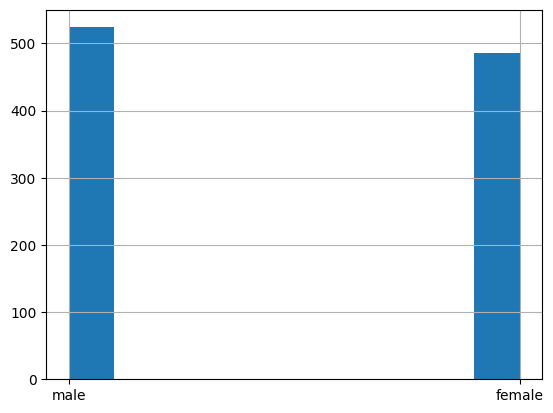

In [22]:
df_2['gender'].hist()

<Axes: xlabel='gender', ylabel='Count'>

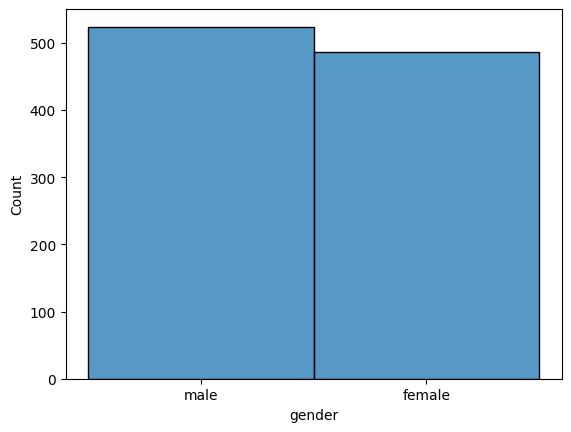

In [36]:
sns.histplot(df_2['gender'], binwidth = 1)

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

Lo hice arriba.

### 4. What may be happening with the year? 

In [ ]:
df['Year'].value_counts()

Year
2023    952
1990     58
Name: count, dtype: int64

Hay valores en 1990. Deben ser valores "nulos"

### 5. Do we have any duplicates? 

In [40]:
df.duplicated().sum()

0

Nope!

### 6.1. Missing values: Remember the column address

In [45]:
df['address'].value_counts()

Series([], Name: count, dtype: int64)

Esta columna no tiene nada, por lo que la elimino.

In [47]:
df.drop('address', axis = 1, inplace = True)

In [48]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'Year', 'Age'],
      dtype='object')

### 6.2. What about the missing values of the column Age? 

In [53]:
df['Age'].isnull().sum()

67

### 7. What is going on with the math scores?

In [58]:
df['math score'].sort_values(ascending = False).value_counts()

math score
63     36
77     31
71     30
74     28
57     27
       ..
29      1
34      1
25      1
23      1
120     1
Name: count, Length: 78, dtype: int64

<Axes: xlabel='math score', ylabel='Count'>

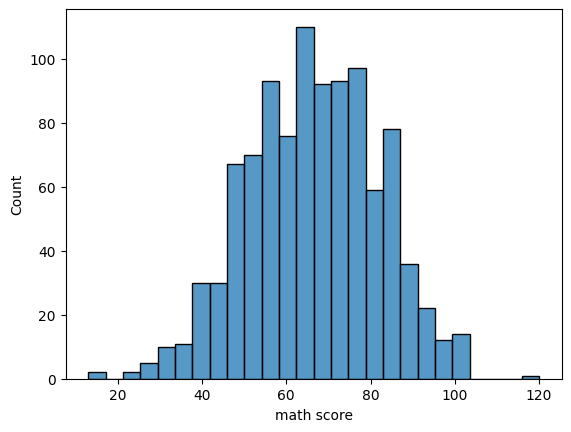

In [54]:
sns.histplot(df['math score'])

In [ ]:
#Eliminamos los valores mayores a 100
df = df[df['math score'] <= 100]

## Do some initial plots? EDA

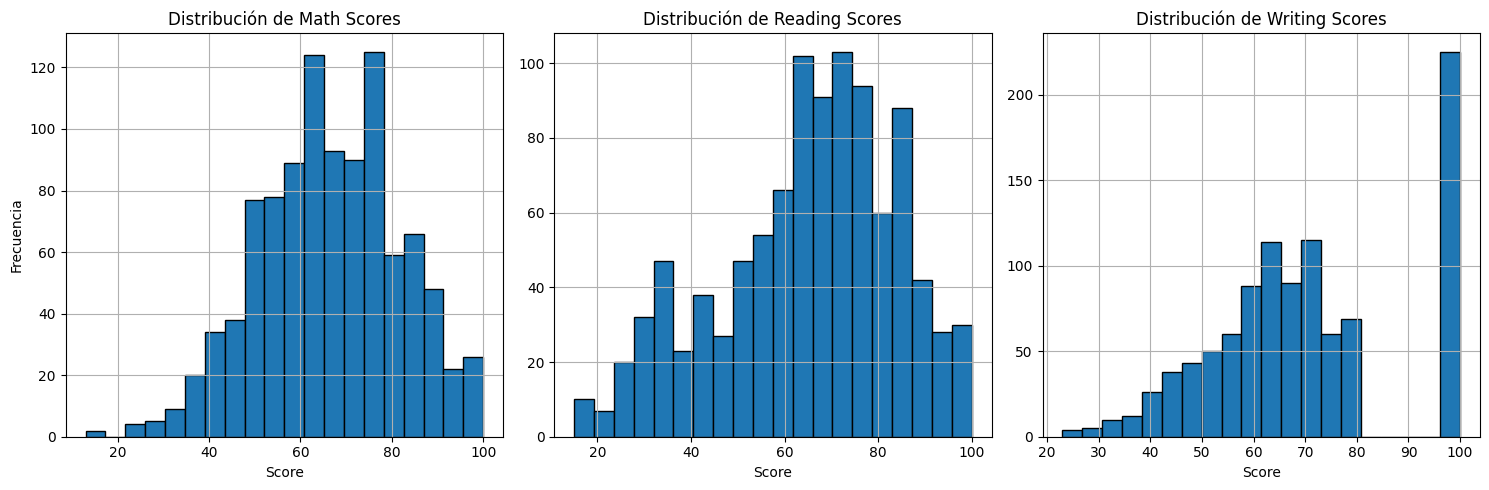

In [63]:
import matplotlib.pyplot as plt

# Estadísticas descriptivas de las calificaciones
stats = df[['math score', 'reading score', 'writing score']].describe()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df['math score'].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title('Distribución de Math Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frecuencia')

df['reading score'].hist(ax=axes[1], bins=20, edgecolor='black')
axes[1].set_title('Distribución de Reading Scores')
axes[1].set_xlabel('Score')

df['writing score'].hist(ax=axes[2], bins=20, edgecolor='black')
axes[2].set_title('Distribución de Writing Scores')
axes[2].set_xlabel('Score')

plt.tight_layout()
plt.show()

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



### 2-variable Analysis with Parental education column 

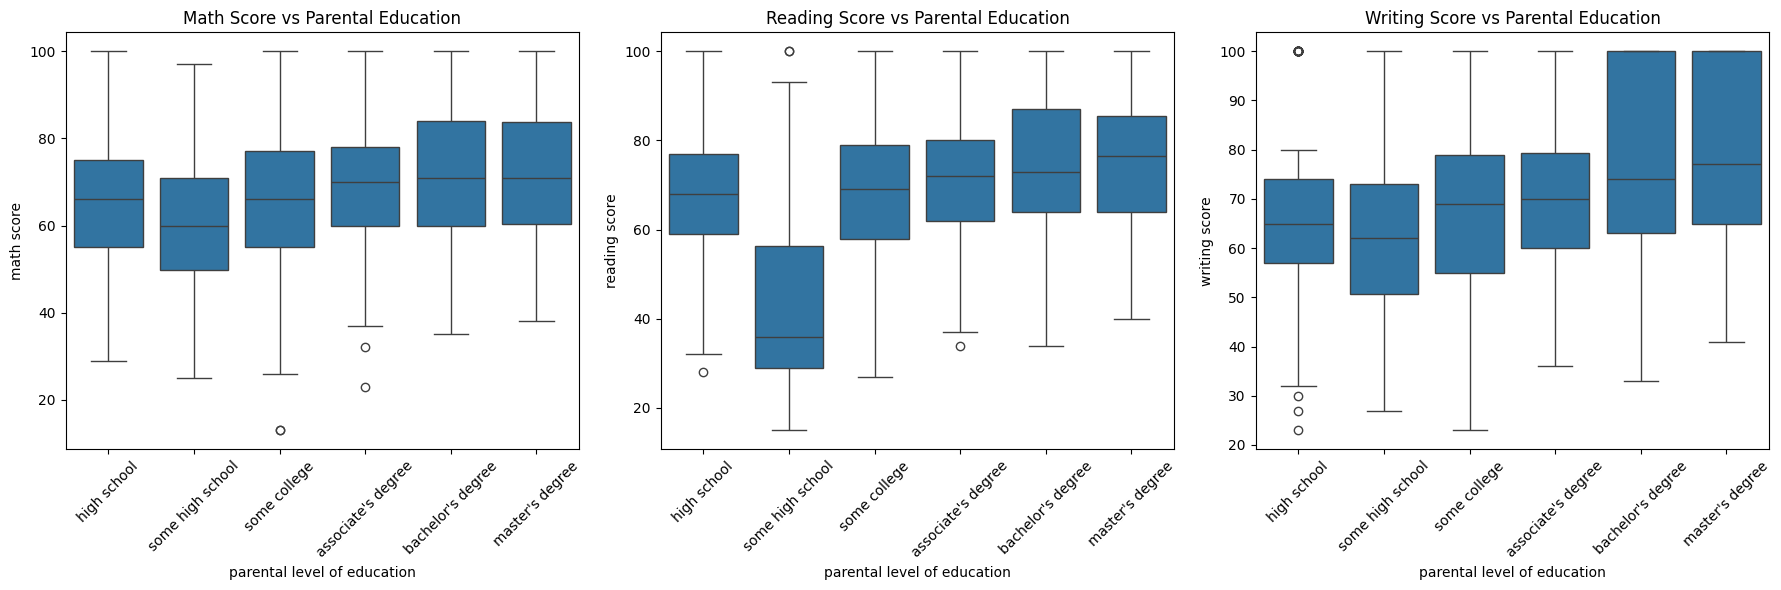

In [68]:
import seaborn as sns

# Boxplots para comparar las calificaciones según el nivel educativo de los padres
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x="parental level of education", y="math score", ax=axes[0])
axes[0].set_title("Math Score vs Parental Education")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="parental level of education", y="reading score", ax=axes[1])
axes[1].set_title("Reading Score vs Parental Education")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="parental level of education", y="writing score", ax=axes[2])
axes[2].set_title("Writing Score vs Parental Education")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2-variable Analysis with Lunch column 

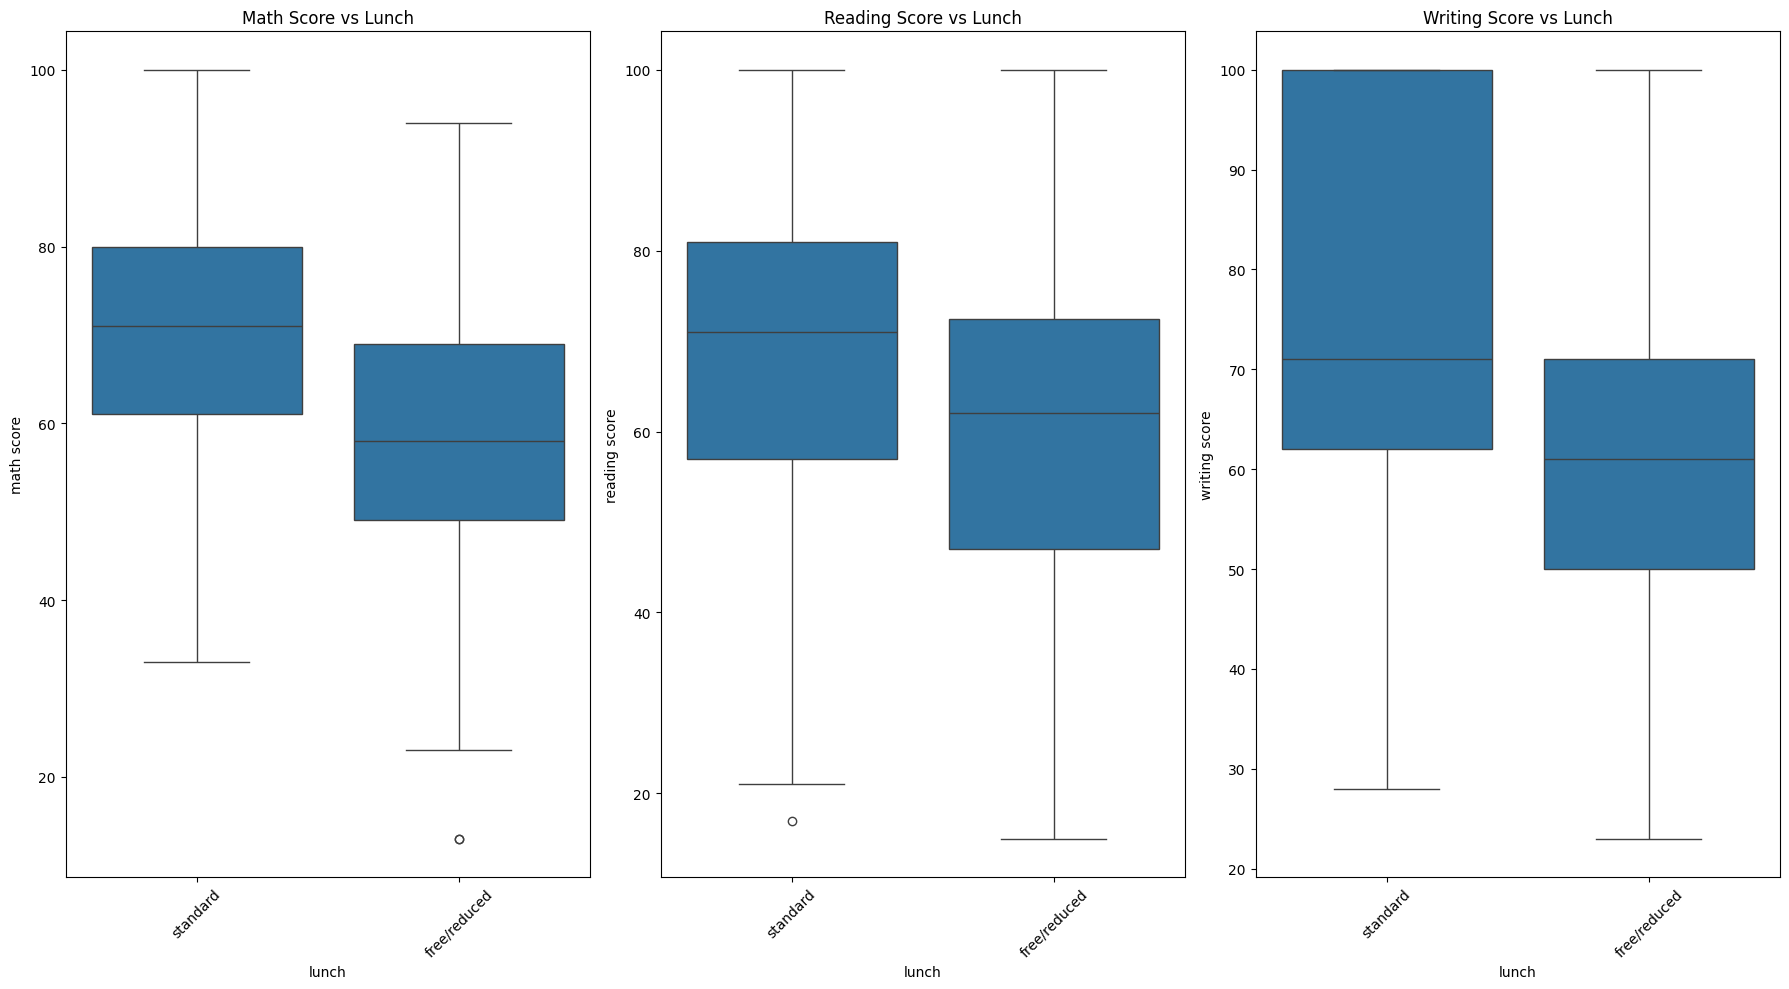

In [80]:
# Comparación del rendimiento según el tipo de almuerzo y preparación previa
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

sns.boxplot(data=df, x="lunch", y="math score", ax=axes[0])
axes[0].set_title("Math Score vs Lunch")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="lunch", y="reading score", ax=axes[1])
axes[1].set_title("Reading Score vs Lunch")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="lunch", y="writing score", ax=axes[2])
axes[2].set_title("Writing Score vs Lunch")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2-variable Analysis with gender column 

In [84]:
df['gender'] = [str.lower(x) for x in df['gender']]

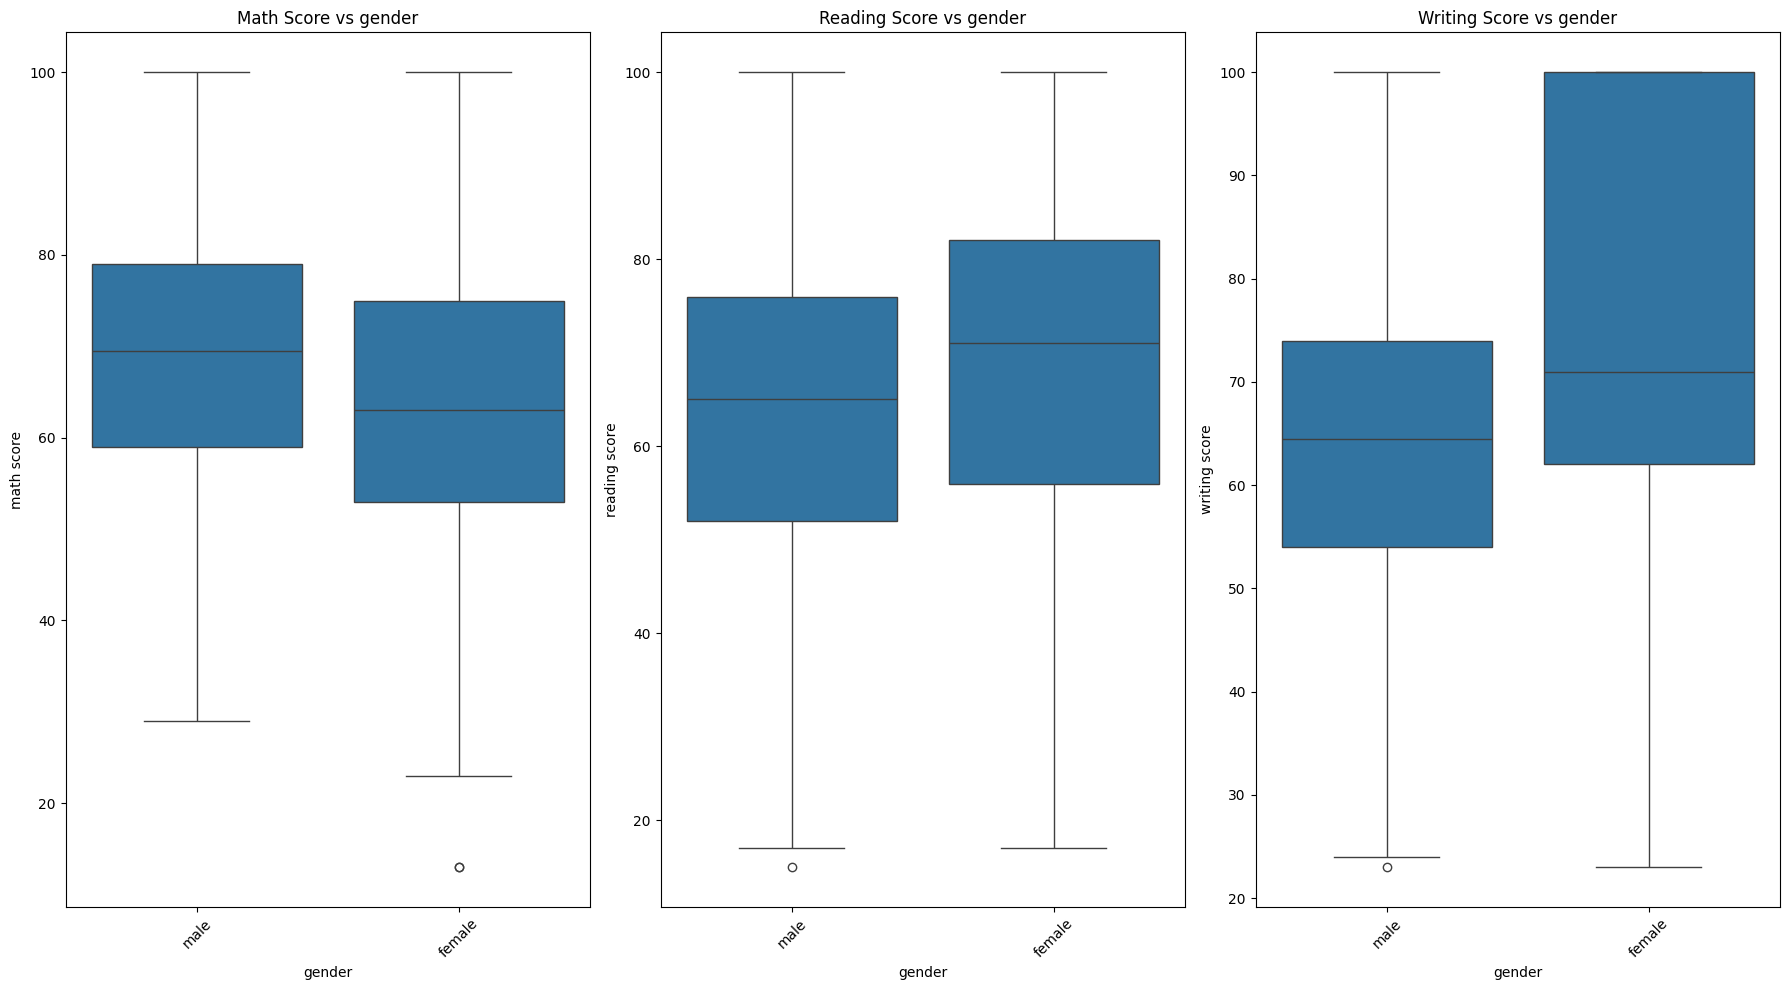

In [86]:
# Comparación del rendimiento según el tipo de almuerzo y preparación previa
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

sns.boxplot(data=df, x="gender", y="math score", ax=axes[0])
axes[0].set_title("Math Score vs gender")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="gender", y="reading score", ax=axes[1])
axes[1].set_title("Reading Score vs gender")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="gender", y="writing score", ax=axes[2])
axes[2].set_title("Writing Score vs gender")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2-variable Analysis with Test preparation course column 

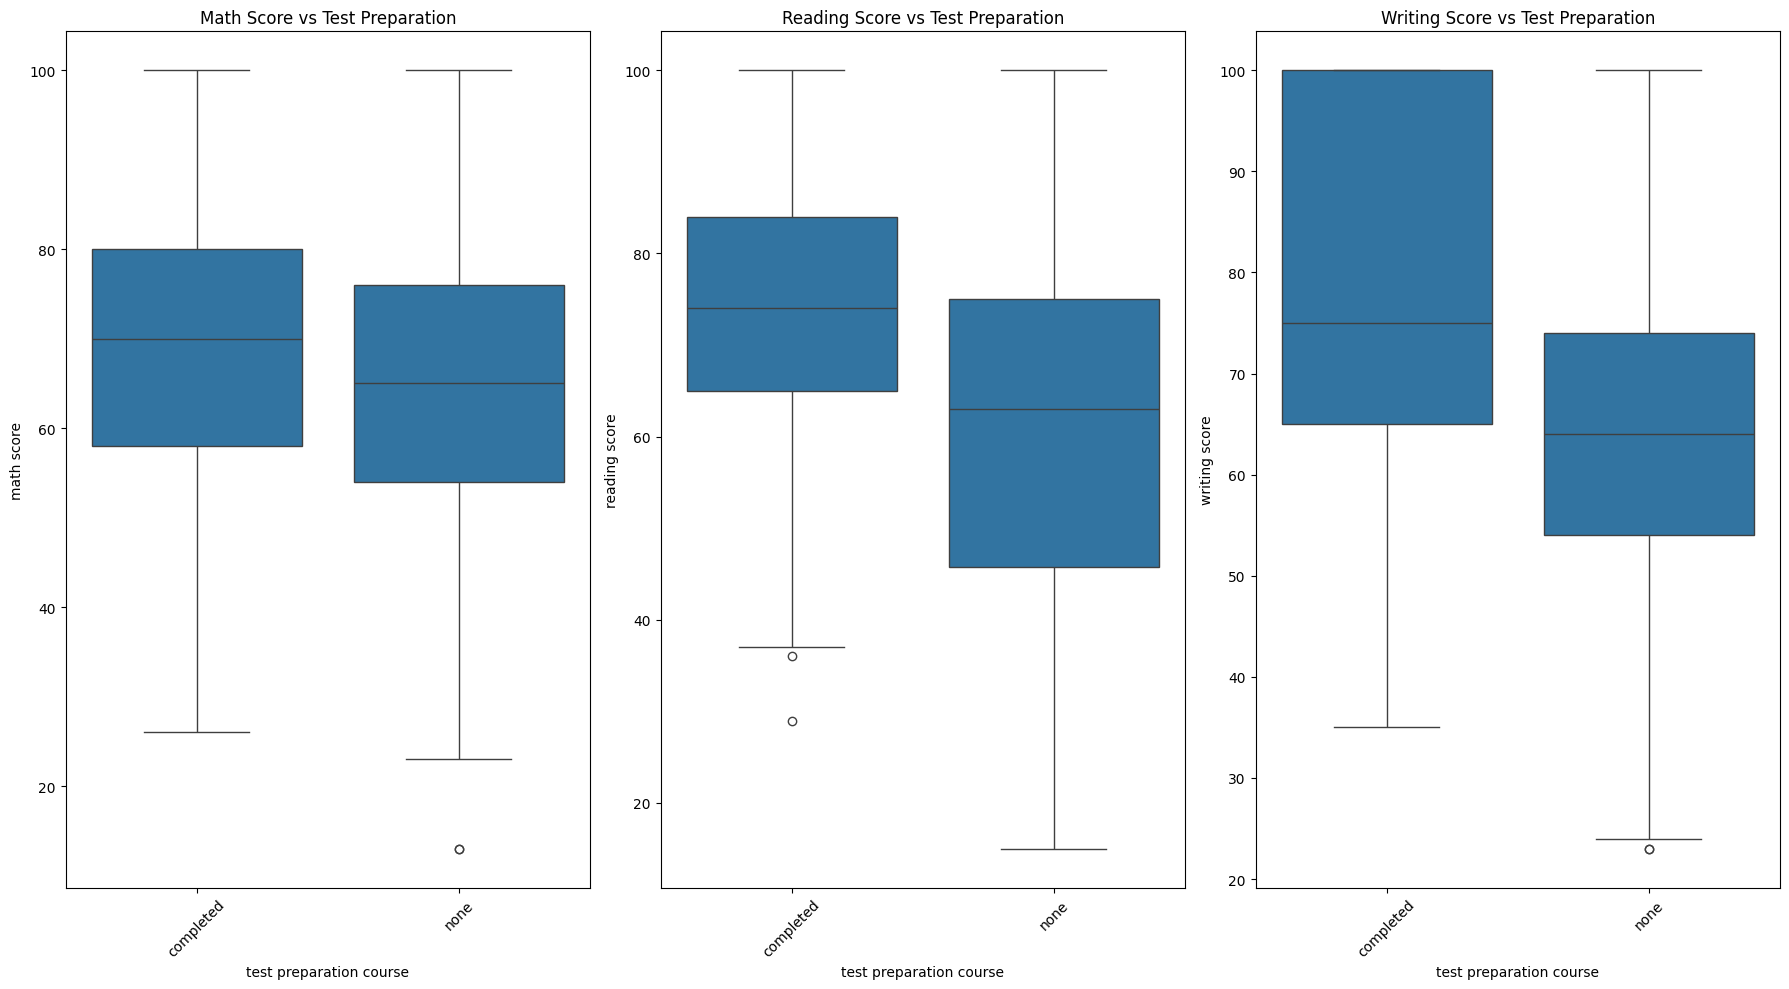

In [90]:
# Comparación del rendimiento según el tipo de almuerzo y preparación previa
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

sns.boxplot(data=df, x="test preparation course", y="math score", ax=axes[0])
axes[0].set_title("Math Score vs Test Preparation")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="test preparation course", y="reading score", ax=axes[1])
axes[1].set_title("Reading Score vs Test Preparation")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="test preparation course", y="writing score", ax=axes[2])
axes[2].set_title("Writing Score vs Test Preparation")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client